![](https://wallpaperaccess.com/full/803470.jpg)

# Soil-Type-Classification for Crops Suggestion 🌳🌲🎄🎋🌴
<br>Problem Statement: Classifying the type of the Soil from Input Image.
# Model deployed as Web-Application API at:🎯🔗📳  <br>
https://soilnet.herokuapp.com/

# GitHub Repo <br>
https://github.com/OMIII1997/Soil-Type-Classification 

# Dataset available at: 📚📓🗞💾 <br>
https://www.kaggle.com/omkargurav/soil-classification-image-data
<br>


For this project a deep learning model is trained with 903 images of four different types soil. "Alluvial", "Black", "Clay" , "Red". All images are collected from Google Search Engine  and crafted and filtered. 
<br>

Based on the type of the Soil Crops will be suggested. Model is deployed on Heroku Platform

# Acknoledgement: 🎓💡🏷🔖📌  <br>
I am expressing my gratitude towards Sir Krish Naik for his super clear explanation about Neural Network in
 Deep Learning Playlist and Model Deployment Tutorial on YouTube.

I am also thankful to Sir Akash Zade for his model deployment explanation at AI in Agri Playlist.


# Click on Below Link for Project Demo: 😍👀🔍📺📡 <br>
https://youtu.be/gnKmbgbPRJA

# Sample:🖥🖨✔🖼📷 <br>
![Image](https://soilnet.herokuapp.com/static/css/images/Clay_2.jpg)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import skimage.io
import tensorflow 
import os
import glob
import tqdm

from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D

%matplotlib inline 

In [21]:
print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.0.0


# **Creating class for Telegram Bot Message Updates along with Graph**

For complete guidanc and example of making Telegram bot visit here:<br>
https://github.com/OMIII1997/Telegram-Bot-for-Model-Training-Updates <br>

Get access_token from Telegram app: 
* Open Telegram mobile app 
* Search for "BotFather" 
* Send "/start"
* After reply from BotFather send "/newbot"
* Give name to your Bot Eg: Example_Bot
* Give username to your Bot Eg: My_Example_bot *Note: User name must end with '_bot'* 
* Done...Congratulations You have crated your own Telegram bot. Now you will get Token to access the HTTP API. Copy that Token Key.

In [22]:
# Training Data

alluvial_soil = os.listdir('Soil_Dataset/Train/Alluvial_Soil/')
black_soil    = os.listdir('Soil_Dataset/Train/Black_Soil/')
clay_soil     = os.listdir('Soil_Dataset/Train/Clay_Soil/')
red_soil      = os.listdir('Soil_Dataset/Train/Red_Soil/')

In [23]:

train_dir = 'Soil_Dataset/Train'
test_dir = 'Soil_Dataset/Test'

image_size = 224

In [24]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range=45,
                            zoom_range=0.40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            vertical_flip= True,
                            fill_mode="nearest")

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode="categorical")


Found 715 images belonging to 4 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150,150),
                                            batch_size=32,
                                            class_mode="categorical")

Found 188 images belonging to 4 classes.


In [31]:

#=================================================================
chanDim = 1
model = Sequential(name="SoilNet")
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(150,150,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation("softmax"))


model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
reduction_lr = ReduceLROnPlateau(monitor = "val_accuracy",patience = 2 ,verbose = 1, factor = 0.2, min_lr = 0.00001)
model.summary()
#plot_model(model,show_shapes=True)


Model: "SoilNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)        32832     
_________________________________________________________________
activation_8 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        6560

In [32]:
callback_list = [reduction_lr]

In [33]:
#bot_callback = botCallback(access_token)
#plotter = Plotter(access_token)
#callback_list = [bot_callback,plotter] callbacks=callback_list
#start = time.time()

history = model.fit_generator(train_data,
                    steps_per_epoch = 30,
                    validation_data = test_data,
                    validation_steps = 30,
                    epochs=20,
                    callbacks = callback_list)
#end = time.time()
#print("Total train time: ",(end-start)/60," mins")

Epoch 1/20
30/30 [==============================] - 48s 2s/step - loss: 2.3556 - accuracy: 0.6580 - val_loss: 7.3395 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 49s 2s/step - loss: 0.6451 - accuracy: 0.7990 - val_loss: 3.5056 - val_accuracy: 0.5053
Epoch 3/20
30/30 [==============================] - 48s 2s/step - loss: 0.5378 - accuracy: 0.8094 - val_loss: 2.8832 - val_accuracy: 0.5053
Epoch 4/20
30/30 [==============================] - 48s 2s/step - loss: 0.5703 - accuracy: 0.8094 - val_loss: 0.8009 - val_accuracy: 0.7500
Epoch 5/20
30/30 [==============================] - 47s 2s/step - loss: 0.3893 - accuracy: 0.8519 - val_loss: 3.0233 - val_accuracy: 0.4947
Epoch 6/20
29/30 [============================>.] - ETA: 1s - loss: 0.3804 - accuracy: 0.8545
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 [==============================] - 49s 2s/step - loss: 0.3742 - accuracy: 0.8562 - val_loss: 1.3396 - val_accuracy: 0.6

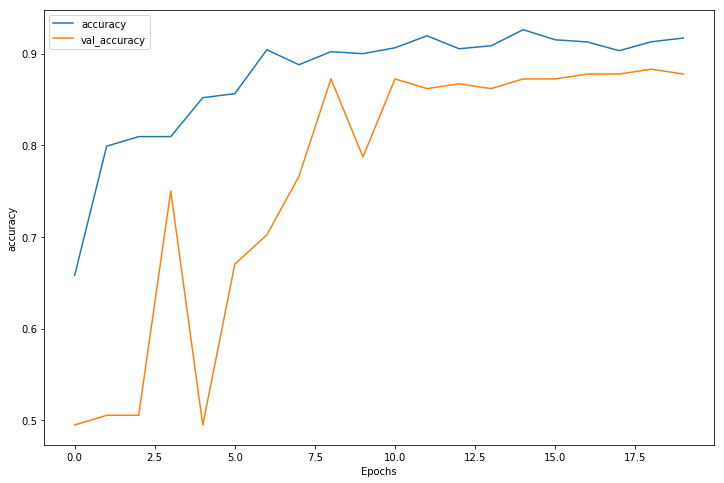

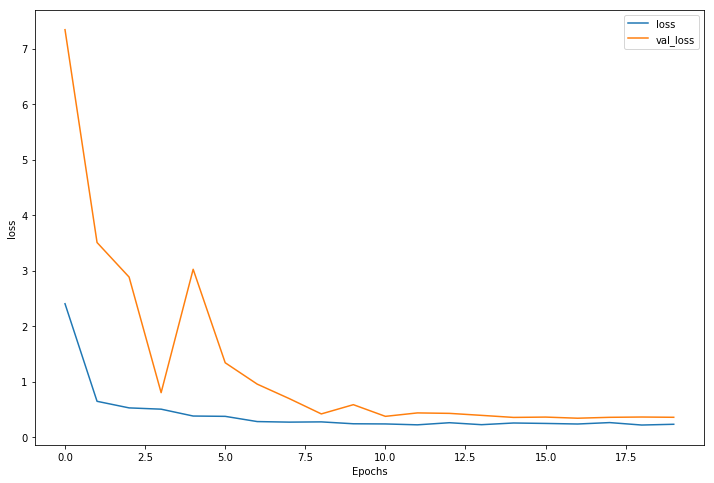

In [34]:
def plot_graph(history,string):
    plt.figure(figsize=(12,8))
    plt.plot(history.history[string],label=str(string))
    plt.plot(history.history["val_"+str(string)],label="val_"+str(string))
    plt.xlabel("Epochs")
    plt.ylabel(str(string))
    plt.legend()
    plt.show()
plot_graph(history,"accuracy")
plot_graph(history,"loss")

In [35]:
model.save("SoilNet.h5")

In [36]:
from IPython.display import FileLink
FileLink('SoilNet.h5')


C:\Users\Mrida\Documents\Python\Soil-Type-Classification-master\SoilNet.h5